In [5]:
import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import realcontour_1D
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def Gaussexp(z, lamb):
    return 1j*lamb*z*z

def gradh(z, lamb):
    return 2*1j*lamb*np.conj(z)

def answer(lamb):
    return np.pi*1j/lamb

In [7]:
# init model
lamb = 1
delta = 0.00001
Nstep = 100
dt = 1e-2

contour = realcontour_1D(100,(-1,1))

plind = plmodel(contour, Gaussexp, grad=gradh, expargs=[lamb])

In [14]:
points = plind.contour.points
edges = plind.contour.edges
differences = (points[edges][:, 0] - points[edges][:, 1])

In [4]:
plind.descend(dt, Nstep, delta, -5)

IndexError: too many indices for array

In [101]:
len(plind.contour.points)

44

In [126]:
points = plind.contour.points
edges = plind.contour.edges

differences = (points[edges][:, 0] - points[edges][:, 1])
np.sqrt(np.sum([differences[:, i]**2 for i in np.arange(0, 1)], 0))

IndexError: too many indices for array

In [119]:
plind.contour.ndim

1

In [128]:
differences.shape

(99,)

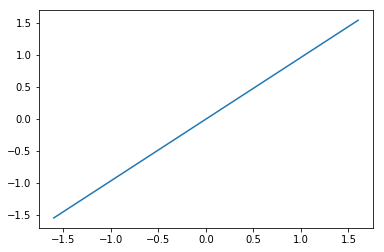

In [102]:
plt.figure()
plt.plot(plind.contour.points.real, plind.contour.points.imag)
plt.show()

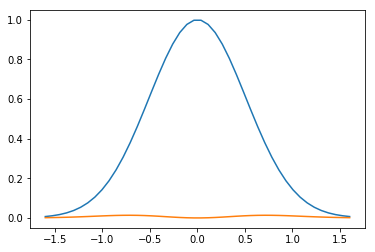

In [103]:
intfun = plind.get_intfun()

plt.figure()
plt.plot(plind.contour.points.real, intfun(plind.contour.points, lamb).real)
plt.plot(plind.contour.points.real, intfun(plind.contour.points, lamb).imag)
plt.show()